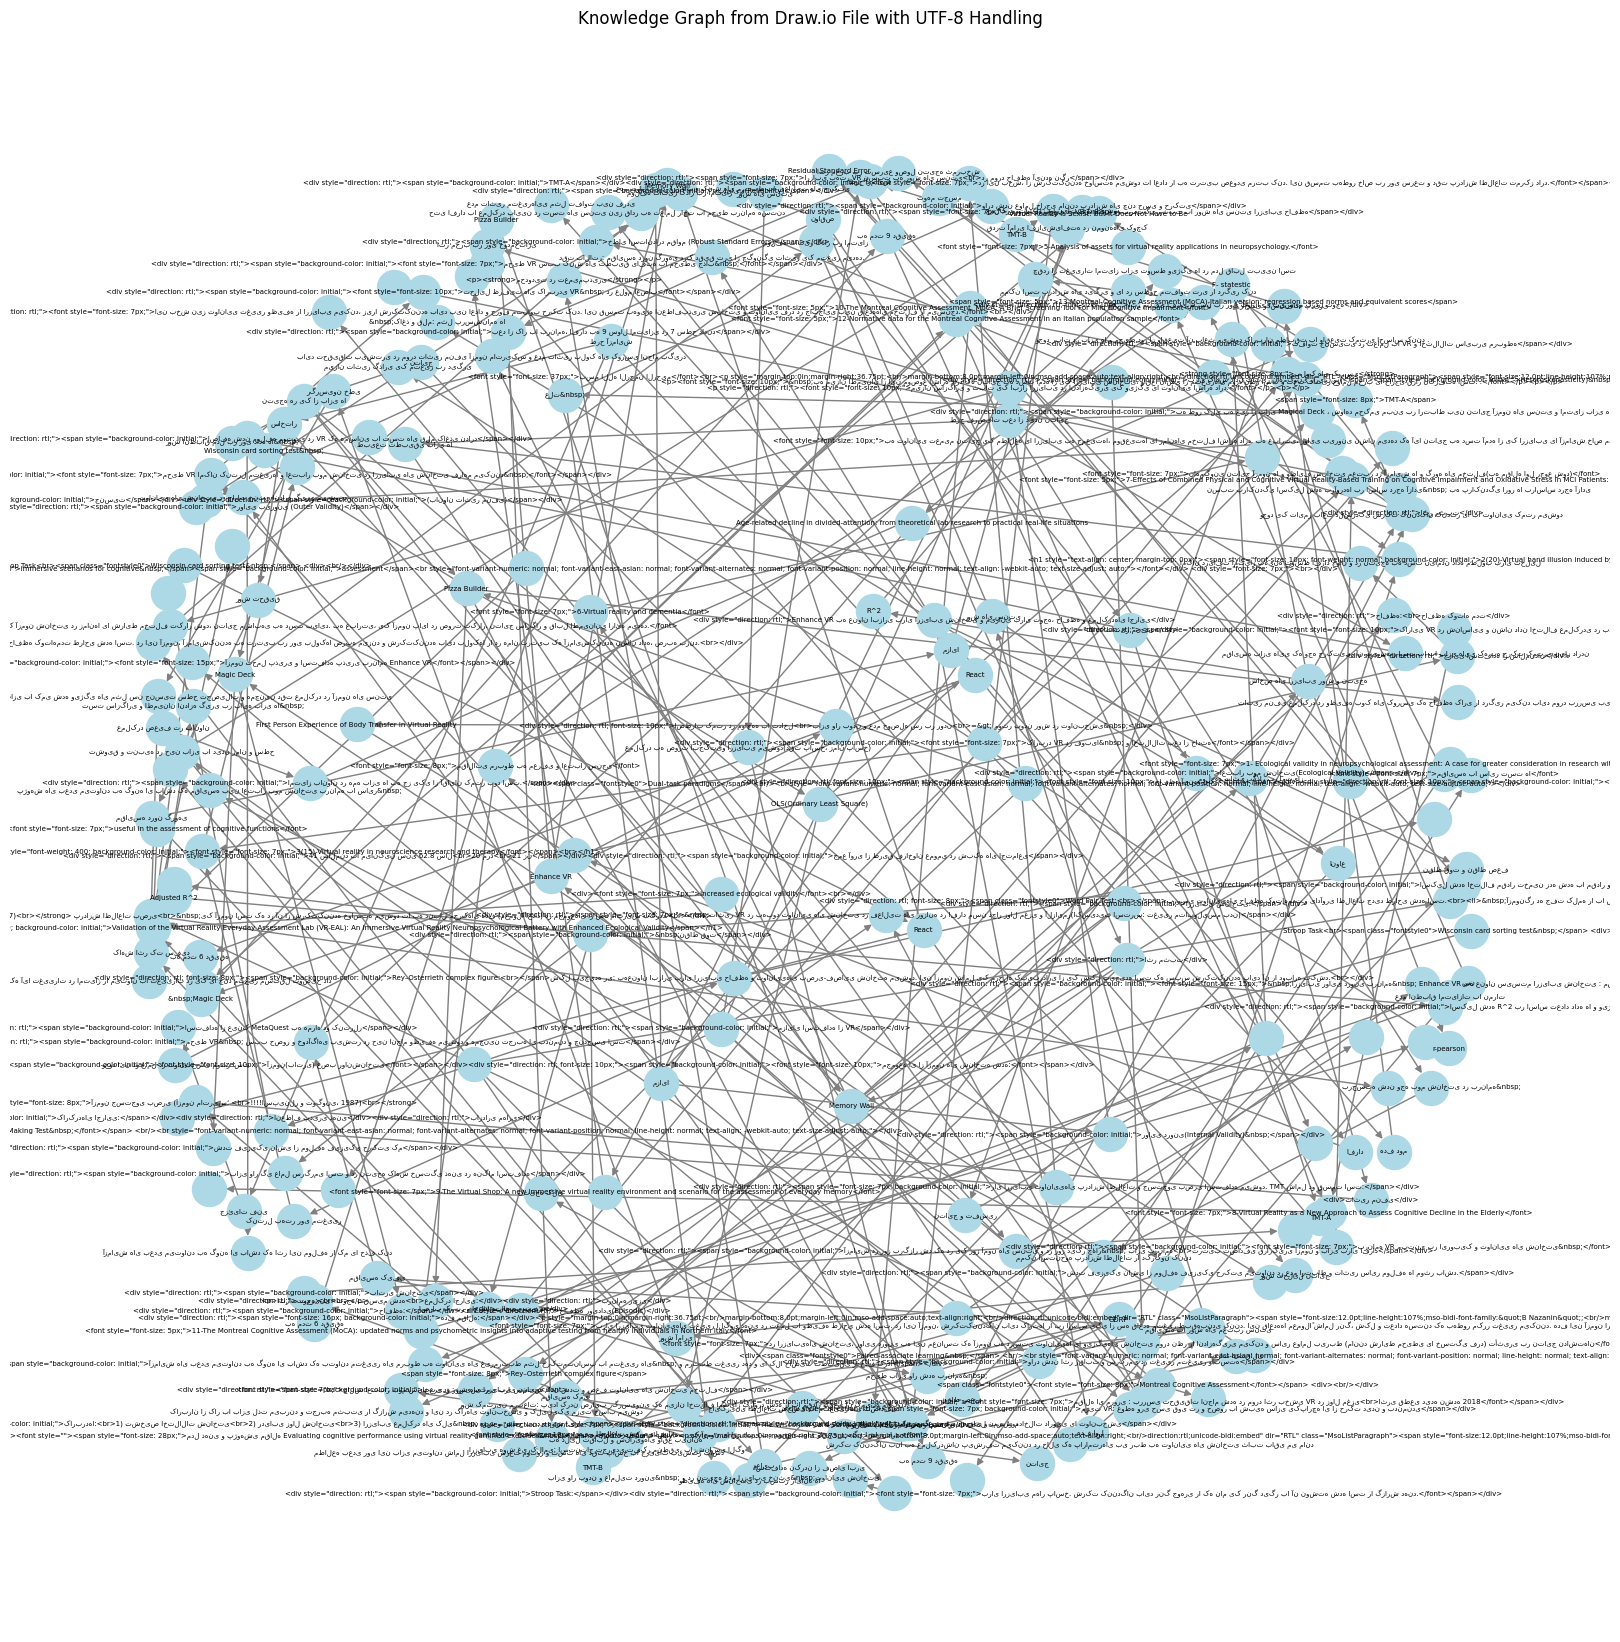

In [3]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

# Path to the uploaded drawio file
file_path = 'Mind & research Map.drawio'

# Parse the drawio file content with UTF-8 encoding
with open(file_path, 'r', encoding='utf-8') as file:
    tree = ET.parse(file)
    root = tree.getroot()

# Extract nodes and edges from the drawio file
nodes = []
edges = []

for elem in root.iter('mxCell'):
    # mxCell has attributes for edges and nodes
    if 'edge' in elem.attrib:
        source = elem.attrib.get('source')
        target = elem.attrib.get('target')
        if source and target:
            edges.append((source, target))
    elif 'value' in elem.attrib:
        node_id = elem.attrib.get('id')
        node_value = elem.attrib.get('value')
        if node_id and node_value:
            # Properly handle any HTML-encoded characters (e.g., from Draw.io's format)
            nodes.append((node_id, node_value))

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph
for node_id, node_value in nodes:
    G.add_node(node_id, label=node_value)

for source, target in edges:
    G.add_edge(source, target)

# Extract node labels for visualization
node_labels = {node_id: node_value for node_id, node_value in nodes}

# Plot the graph
# Create a larger figure size
plt.figure(figsize=(16, 16))

# Adjust the layout for better spacing between nodes
pos = nx.spring_layout(G, k=0.8, iterations=50)  # Increase the k value for more spacing

# Draw the graph without labels
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=600, edge_color='gray', arrows=True)

# Optionally, draw labels separately with reduced font size
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=5)

plt.title("Knowledge Graph from Draw.io File with UTF-8 Handling")
plt.show()


In [5]:
import xml.etree.ElementTree as ET
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Replace with your Neo4j URI
username = "neo4j"
password = "your_password"

# Connect to Neo4j
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to create nodes and relationships in Neo4j
def create_graph_in_neo4j(nodes, edges):
    with driver.session() as session:
        # Create nodes in Neo4j
        for node_id, node_value in nodes:
            session.run(
                "MERGE (n:Node {id: $id, label: $label})", 
                id=node_id, label=node_value
            )
        
        # Create relationships in Neo4j
        for source, target in edges:
            session.run("""
            MATCH (a:Node {id: $source}), (b:Node {id: $target})
            MERGE (a)-[:CONNECTED_TO]->(b)
            """, source=source, target=target)

# Parse the drawio file and extract nodes and edges
def parse_drawio(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    nodes = []
    edges = []

    for elem in root.iter('mxCell'):
        if 'edge' in elem.attrib:
            # If it's an edge, extract source and target
            source = elem.attrib.get('source')
            target = elem.attrib.get('target')
            if source and target:
                edges.append((source, target))
        elif 'value' in elem.attrib:
            # If it's a node, extract its ID and value
            node_id = elem.attrib.get('id')
            node_value = elem.attrib.get('value')
            if node_id and node_value:
                nodes.append((node_id, node_value))
    
    return nodes, edges

# File path to your drawio file
file_path = 'Mind & research Map.drawio'  # Change to your actual file path

# Parse the drawio file
nodes, edges = parse_drawio(file_path)

# Insert the parsed data into Neo4j
create_graph_in_neo4j(nodes, edges)

# Close the Neo4j connection
driver.close()


In [1]:
from neo4j import GraphDatabase

# اطلاعات اتصال به Neo4j
uri = "bolt://localhost:7687"  
username = "neo4j"
password = "your_password"

# اتصال به Neo4j
driver = GraphDatabase.driver(uri, auth=(username, password))

# تابع برای ایجاد گره‌ها و روابط در Neo4j
def create_graph_in_neo4j(nodes, edges):
    with driver.session() as session:
        # ایجاد گره‌ها در Neo4j
        for node_id, node_value, node_type in nodes:
            session.run(
                "MERGE (n:Node {id: $id, label: $label, type: $type})", 
                id=node_id, label=node_value, type=node_type
            )
        
        # ایجاد روابط در Neo4j
        for source, target, relationship in edges:
            session.run("""  
            MATCH (a:Node {id: $source}), (b:Node {id: $target})
            MERGE (a)-[:CONNECTED_TO {type: $relationship}]->(b)
            """, source=source, target=target, relationship=relationship)

# تعریف گره‌ها و روابط
nodes = [
    (1, "حافظه", "مفهوم"),
    (2, "یادگیری", "مفهوم"),
    (3, "توجه", "مفهوم"),
    (4, "ادراک", "مفهوم"),
    (5, "نظریه پردازش اطلاعات", "نظریه"),
    (6, "نظریه رفتارگرایی", "نظریه"),
    (7, "نوام چامسکی", "پژوهشگر"),
    (8, "الیزابت لوفتوس", "پژوهشگر"),
    (9, "دانیل کانمن", "پژوهشگر"),
    (10, "تفکر انتقادی", "مفهوم"),
    (11, "حل مسئله", "مفهوم"),
    (12, "خلاقیت", "مفهوم"),
    (13, "دقت تصمیم‌گیری", "مهارت"),
    (14, "نظریه بار شناختی", "نظریه"),
    (15, "نظریه هوش چندگانه", "نظریه"),
    (16, "هاوارد گاردنر", "پژوهشگر"),
    (17, "جان سوانسون", "پژوهشگر"),
    (18, "نظریه شناختی اجتماعی", "نظریه"),
    (19, "حافظه کوتاه‌مدت", "مفهوم"),
    (20, "حافظه بلندمدت", "مفهوم"),
    (21, "شناخت اجرایی", "مهارت"),
    (22, "بازشناسی الگو", "مهارت"),
    (23, "هوش هیجانی", "مهارت"),
    (24, "مدل ذهن", "مفهوم"),
    (25, "توسعه شناختی", "نظریه"),
    (26, "ژان پیاژه", "پژوهشگر"),
    (27, "آلبرت بندورا", "پژوهشگر"),
    (28, "شناخت اجتماعی", "مفهوم"),
    (29, "تفکر استراتژیک", "مهارت"),
    (30, "استدلال منطقی", "مهارت"),
    (31, "پردازش زبان طبیعی", "مفهوم"),
    (32, "هوش مصنوعی در شناخت", "کاربرد"),
    (33, "علوم اعصاب شناختی", "شاخه"),
    (34, "حافظه کاری", "مفهوم"),
    (35, "حل خلاقانه مسائل", "مهارت"),
    (36, "مدل‌سازی شناختی", "ابزار"),
    (37, "استدلال قیاسی", "مهارت"),
    (38, "نظریه‌های یادگیری", "نظریه"),
    (39, "نظریه ذهن گسترده", "نظریه"),
    (40, "جان مک‌کارتی", "پژوهشگر"),
    (41, "آلن نیول", "پژوهشگر"),
    (42, "ارتباطات عصبی", "مفهوم"),
    (43, "سیستم‌های حافظه", "مفهوم"),
    (44, "نظریه ظرفیت محدود", "نظریه"),
    (45, "توجه انتخابی", "مهارت"),
    (46, "تحریک مغزی غیرتهاجمی", "روش"),
    (47, "نورون‌های آینه‌ای", "مفهوم"),
    (48, "سیستم عصبی مرکزی", "ساختار"),
    (49, "نوروپلاستیسیته", "مفهوم"),
    (50, "روان‌شناسی شناختی", "شاخه"),
    (51, "علوم اعصاب شناختی پیشرفته", "شاخه"),
    (52, "حافظه ضمنی", "مفهوم"),
    (53, "حافظه صریح", "مفهوم"),
    (54, "الگوریتم‌های یادگیری", "مفهوم"),
    (55, "پردازش دوگانه", "نظریه"),
    (56, "حافظه اپیزودیک", "مفهوم"),
    (57, "حافظه معنایی", "مفهوم"),
    (58, "جان اندرسون", "پژوهشگر"),
    (59, "تاثیر گواهی حافظه", "مفهوم"),
    (60, "مغز اجتماعی", "مفهوم"),
    (61, "ارتباطات شناختی", "مفهوم"),
    (62, "یادگیری عمیق", "مفهوم"),
    (63, "نظریه چند فرآیندی", "نظریه"),
    (64, "نظریه ذهن همگرا", "نظریه"),
    (65, "هوش جمعی", "مفهوم"),
    (66, "رابرت استرنبرگ", "پژوهشگر"),
    (67, "هوش متبلور", "مفهوم"),
    (68, "هوش سیال", "مفهوم"),
    (69, "نظریه حافظه چندگانه", "نظریه"),
    (70, "مدل‌های ذهنی", "مفهوم"),
    (71, "کنترل اجرایی", "مهارت"),
    (72, "دیوید روملهارت", "پژوهشگر"),
     (73, "نظریه‌های یادگیری ماشینی", "نظریه"),
    (74, "مدل‌های شبکه عصبی", "مفهوم"),
    (75, "یادگیری تقویتی", "مفهوم"),
    (76, "فرآیند تصمیم‌گیری", "مفهوم"),
    (77, "نظریه عامل-عملگر", "نظریه"),
    (78, "نظریه بازی‌ها", "نظریه"),
    (79, "فلسفه ذهن", "شاخه"),
    (80, "نظریه معرفت‌شناسی", "نظریه"),
    (81, "شناخت مشترک", "مفهوم"),
    (82, "داده‌کاوی شناختی", "ابزار"),
    (83, "الگوهای ذهنی پیچیده", "مفهوم"),
    (84, "نظریه همگرایی اجتماعی", "نظریه"),
    (85, "توزیع توجه", "مفهوم"),
    (86, "ارتباطات بین‌رشته‌ای", "مفهوم"),
    (87, "تاثیرات محیطی بر شناخت", "مفهوم"),
    (88, "حافظه رویدادی", "مفهوم"),
    (89, "نظریه کاربردگرایی شناختی", "نظریه"),
    (90, "فلسفه ذهن گسترده", "نظریه"),
    (91, "هوش مصنوعی توزیع‌شده", "مفهوم"),
    (92, "شناخت سیستمی", "مفهوم"),
    (93, "پردازش چندوظیفه‌ای", "مهارت"),
    (94, "الگوریتم‌های تطبیقی", "مفهوم"),
    (95, "نظریه یادگیری نظارتی", "نظریه"),
    (96, "سندروم شناختی", "مفهوم"),
    (97, "یادگیری انتقالی", "مفهوم"),
    (98, "ادراک محیطی", "مفهوم"),
    (99, "درک تعامل انسان و ماشین", "مفهوم"),
    (100, "نظریه ادغام شناختی", "نظریه")

]

edges = [
    (1, 5, "توضیح داده شده با"),
    (2, 1, "ارتباط دارد با"),
    (3, 4, "تعثیر میگذارد روی"),
    (5, 7, "ارائه شده توسط"),
    (5, 8, "توسعه داده شده توسط"),
    (6, 2, "مربوط می شود به"),
    (10, 2, "ارتباط دارد با"),
    (11, 3, "وابسته به"),
    (12, 11, "تاثیر میگذارد روی"),
    (13, 1, "بهبود می‌دهد"),
    (14, 5, "توضیح داده شده با"),
    (15, 16, "ارائه شده توسط"),
    (15, 12, "ارتباط دارد با"),
    (7, 6, "مخالفت با"),
    (17, 14, "توسعه داده شده توسط"),
    (18, 27, "ارائه شده توسط"),
    (19, 1, "زیرمجموعه‌ای از"),
    (20, 1, "زیرمجموعه‌ای از"),
    (19, 20, "انتقال می‌یابد به"),
    (21, 3, "وابسته به"),
    (22, 12, "ارتباط دارد با"),
    (23, 10, "تاثیر می‌گذارد روی"),
    (24, 28, "وابسته به"),
    (25, 26, "ارائه شده توسط"),
    (21, 30, "تقویت می‌کند"),
    (22, 4, "تاثیر می‌گذارد روی"),
    (29, 11, "تقویت می‌کند"),
    (30, 11, "پایه‌گذاری می‌کند"),
    (3, 29, "بهبود می‌بخشد"),
    (6, 25, "ارتباط دارد با"),
    (23, 28, "تقویت می‌کند"),
    (5, 24, "ارتباط دارد با"),
    (31, 5, "ارتباط دارد با"),
    (32, 33, "مورد استفاده در"),
    (33, 42, "تحقیق شده توسط"),
    (34, 19, "بخش اصلی"),
    (35, 12, "بهبود می‌دهد"),
    (36, 5, "استفاده شده در"),
    (37, 30, "تقویت می‌کند"),
    (38, 2, "مرتبط است با"),
    (39, 24, "پیشرفت می‌کند"),
    (40, 32, "پایه‌گذار"),
    (41, 36, "مشارکت‌کننده در"),
    (42, 48, "وابسته به"),
    (43, 1, "بخش اصلی"),
    (44, 14, "ارتباط دارد با"),
    (45, 3, "زیرمجموعه‌ای از"),
    (46, 33, "استفاده شده در"),
    (47, 28, "تحریک می‌شود توسط"),
    (48, 42, "توضیح داده شده در"),
    (49, 33, "وابسته به"),
    (49, 34, "پیشرفت می‌کند"),
    (50, 33, "زیرمجموعه‌ای از"),
    (51, 33, "شاخه‌ای از"),
    (52, 1, "زیرمجموعه‌ای از"),
    (53, 1, "زیرمجموعه‌ای از"),
    (54, 32, "استفاده شده در"),
    (55, 14, "توضیح داده با"),
    (56, 52, "زیرمجموعه‌ای از"),
    (57, 53, "زیرمجموعه‌ای از"),
    (58, 36, "مشارکت‌کننده در"),
    (59, 8, "توضیح داده شده توسط"),
    (60, 28, "ارتباط دارد با"),
    (61, 33, "مورد استفاده در"),
    (62, 32, "ارتباط دارد با"),
    (63, 5, "ارتباط دارد با"),
    (64, 24, "پیشرفت می‌دهد"),
    (65, 29, "تقویت می‌کند"),
    (66, 38, "پژوهشگر"),
    (67, 65, "ارتباط دارد با"),
    (68, 65, "ارتباط دارد با"),
    (69, 1, "توضیح می‌دهد"),
    (70, 24, "پیشرفت داده شده توسط"),
    (71, 3, "زیرمجموعه‌ای از"),
    (72, 5, "پژوهشگر"),
    (73, 74, "ارتباط دارد با"),
    (74, 91, "استفاده شده در"),
    (75, 32, "استفاده شده در"),
    (76, 3, "مربوط به"),
    (77, 76, "توضیح داده شده توسط"),
    (78, 30, "ارتباط دارد با"),
    (79, 24, "تحقیق شده در"),
    (80, 79, "ارتباط دارد با"),
    (81, 28, "مربوط به"),
    (82, 32, "ابزار استفاده شده در"),
    (83, 70, "تقویت می‌شود توسط"),
    (84, 65, "مرتبط با"),
    (85, 3, "تقویت می‌کند"),
    (86, 50, "وابسته به"),
    (87, 33, "تاثیر دارد بر"),
    (88, 1, "زیرمجموعه‌ای از"),
    (89, 5, "ارتباط دارد با"),
    (90, 39, "ارتباط دارد با"),
    (91, 32, "استفاده شده در"),
    (92, 81, "مربوط به"),
    (93, 71, "ارتباط دارد با"),
    (94, 54, "استفاده شده در"),
    (95, 54, "مرتبط با"),
    (96, 33, "مربوط به"),
    (97, 11, "پایه‌گذاری می‌کند"),
    (98, 4, "ارتباط دارد با"),
    (99, 32, "تحقیق شده توسط"),
    (100, 24, "توضیح داده شده توسط")
]

# بارگذاری داده‌ها در Neo4j
create_graph_in_neo4j(nodes, edges)

# بستن اتصال به Neo4j
driver.close()
